In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Dataset .csv')

# Check for and handle missing values
df = df.dropna(subset=['Aggregate rating'])  # Drop rows where target variable is missing

# Select features and target variable
features = df.drop(columns=['Aggregate rating'])
target = df['Aggregate rating']

# Convert categorical variables to numeric (one-hot encoding)
features = pd.get_dummies(features, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define models to be tested
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store performance metrics
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

    # Print the performance metrics
    print(f'\n{model_name} Performance:')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'R-squared (R2): {r2:.2f}')

# Compare model performance
results_df = pd.DataFrame(results).T
print('\nComparison of Model Performance:')
print(results_df)

# Plot performance comparison
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Dataset .csv'

<ipython-input-4-5fccb22c6073>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuisines'] = df['Cuisines'].str.split(',')
<ipython-input-4-5fccb22c6073>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='viridis')



Average Rating for Each Cuisine:
Cuisines
Sunda             4.900000
B�_rek            4.700000
Taiwanese         4.650000
Ramen             4.500000
Dim Sum           4.466667
                    ...   
Moroccan          1.620000
Awadhi            1.572727
Armenian          1.300000
Mineira           0.000000
Cuisine Varies    0.000000
Name: Aggregate rating, Length: 145, dtype: float64


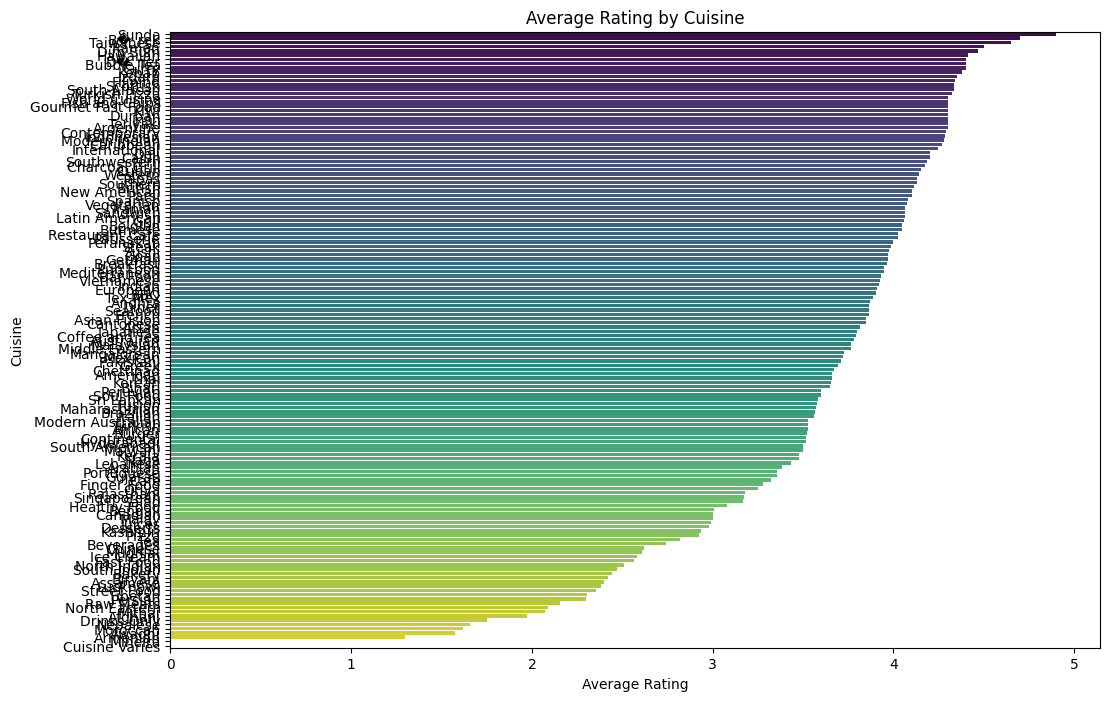


Most Popular Cuisines Based on Number of Votes:
Cuisines
North Indian      595981
Chinese           364351
Italian           329265
Continental       288255
Fast Food         184058
                   ...  
Malay                 25
Canadian               6
Peruvian               5
Cuisine Varies         2
Mineira                2
Name: Votes, Length: 145, dtype: int64


<ipython-input-4-5fccb22c6073>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_votes.values, y=cuisine_votes.index, palette='viridis')


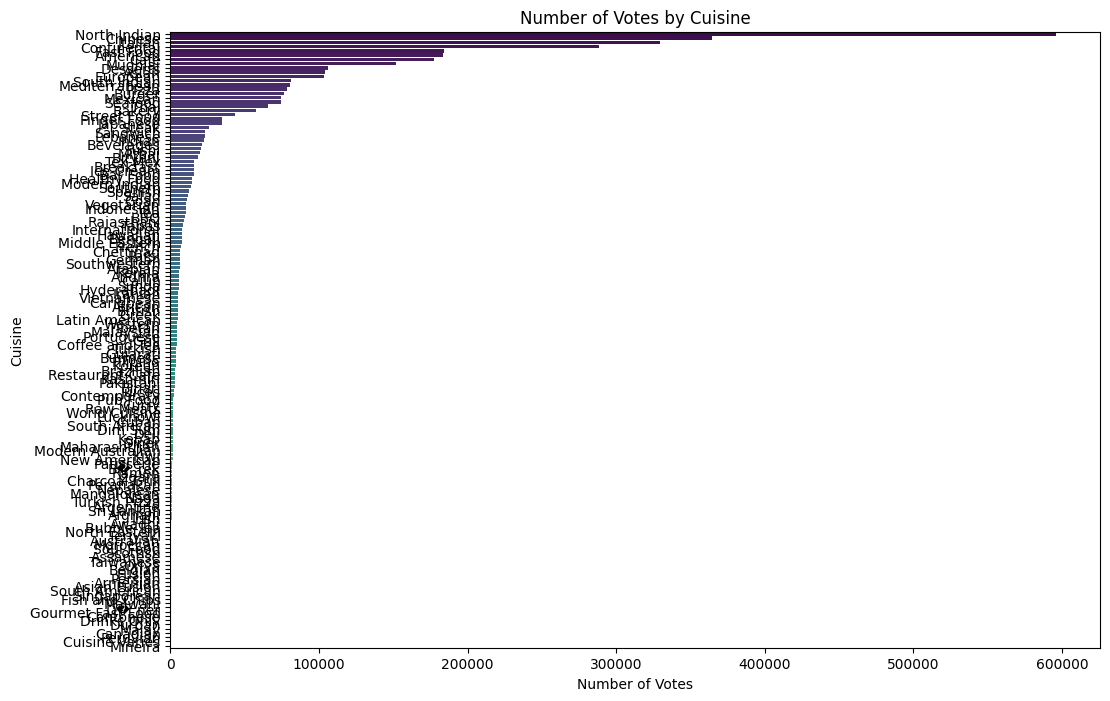

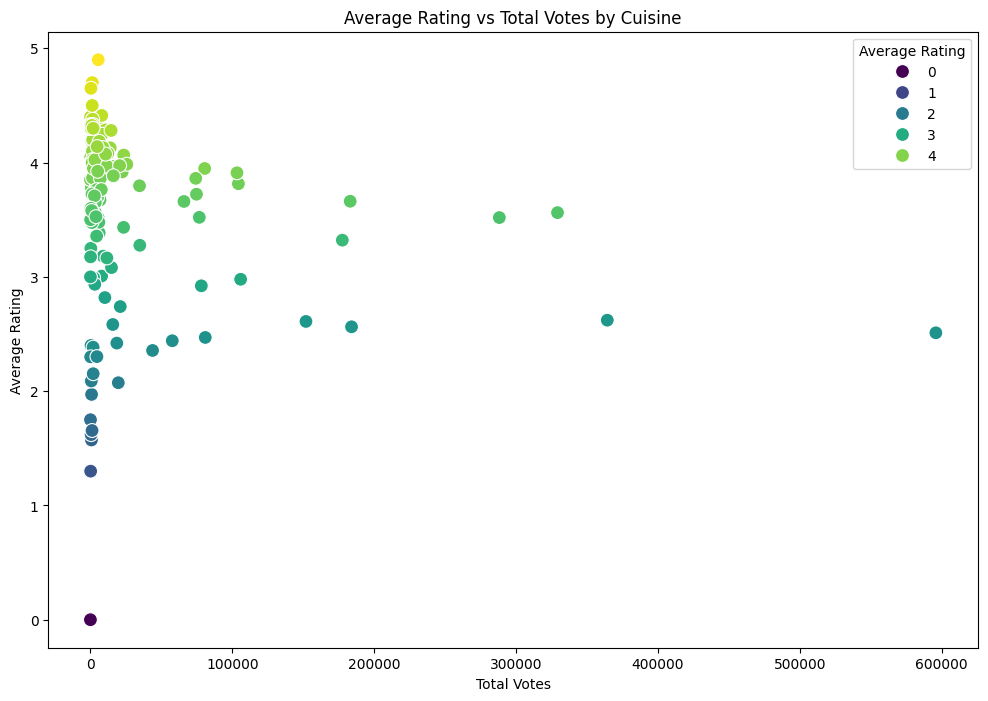


Cuisine Summary:
          Cuisines  Average Rating  Total Votes
0          Afghani        1.971429          811
1          African        3.525000         5020
2         American        3.661538       183117
3           Andhra        3.870000         5946
4          Arabian        3.385714         6150
..             ...             ...          ...
140  Turkish Pizza        4.325000          988
141     Vegetarian        4.073913        10714
142     Vietnamese        3.923810         5120
143        Western        4.140000         4749
144  World Cuisine        4.300000         1905

[145 rows x 3 columns]


In [4]:
# Ensure 'Cuisines', 'Aggregate rating', and 'Votes' columns are in the dataset
if 'Cuisines' not in df.columns or 'Aggregate rating' not in df.columns or 'Votes' not in df.columns:
    raise ValueError("The dataset must contain 'Cuisines', 'Aggregate rating', and 'Votes' columns.")

# Clean the data
# Drop rows where 'Cuisines' or 'Aggregate rating' or 'Votes' are missing
df = df.dropna(subset=['Cuisines', 'Aggregate rating', 'Votes'])

# Analyze the relationship between the type of cuisine and the restaurant's rating
# Split the cuisines into a list (assuming multiple cuisines can be separated by commas)
df['Cuisines'] = df['Cuisines'].str.split(',')

# Explode the list to have one cuisine per row
df_exploded = df.explode('Cuisines')

# Strip any leading/trailing spaces from cuisine names
df_exploded['Cuisines'] = df_exploded['Cuisines'].str.strip()

# Calculate the average rating for each cuisine
cuisine_ratings = df_exploded.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print('\nAverage Rating for Each Cuisine:')
print(cuisine_ratings)

# Plot average rating by cuisine
plt.figure(figsize=(12, 8))
sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='viridis')
plt.title('Average Rating by Cuisine')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

# Identify the most popular cuisines based on the number of votes
# Group by cuisine and sum the votes
cuisine_votes = df_exploded.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print('\nMost Popular Cuisines Based on Number of Votes:')
print(cuisine_votes)

# Plot the number of votes by cuisine
plt.figure(figsize=(12, 8))
sns.barplot(x=cuisine_votes.values, y=cuisine_votes.index, palette='viridis')
plt.title('Number of Votes by Cuisine')
plt.xlabel('Number of Votes')
plt.ylabel('Cuisine')
plt.show()

# Determine if specific cuisines tend to receive higher ratings
# Merge the average ratings and votes
cuisine_summary = pd.DataFrame({
    'Average Rating': cuisine_ratings,
    'Total Votes': cuisine_votes
}).reset_index()

# Plot average rating vs total votes
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cuisine_summary, x='Total Votes', y='Average Rating', hue='Average Rating', palette='viridis', s=100)
plt.title('Average Rating vs Total Votes by Cuisine')
plt.xlabel('Total Votes')
plt.ylabel('Average Rating')
plt.show()

# Display the cuisine summary
print('\nCuisine Summary:')
print(cuisine_summary)

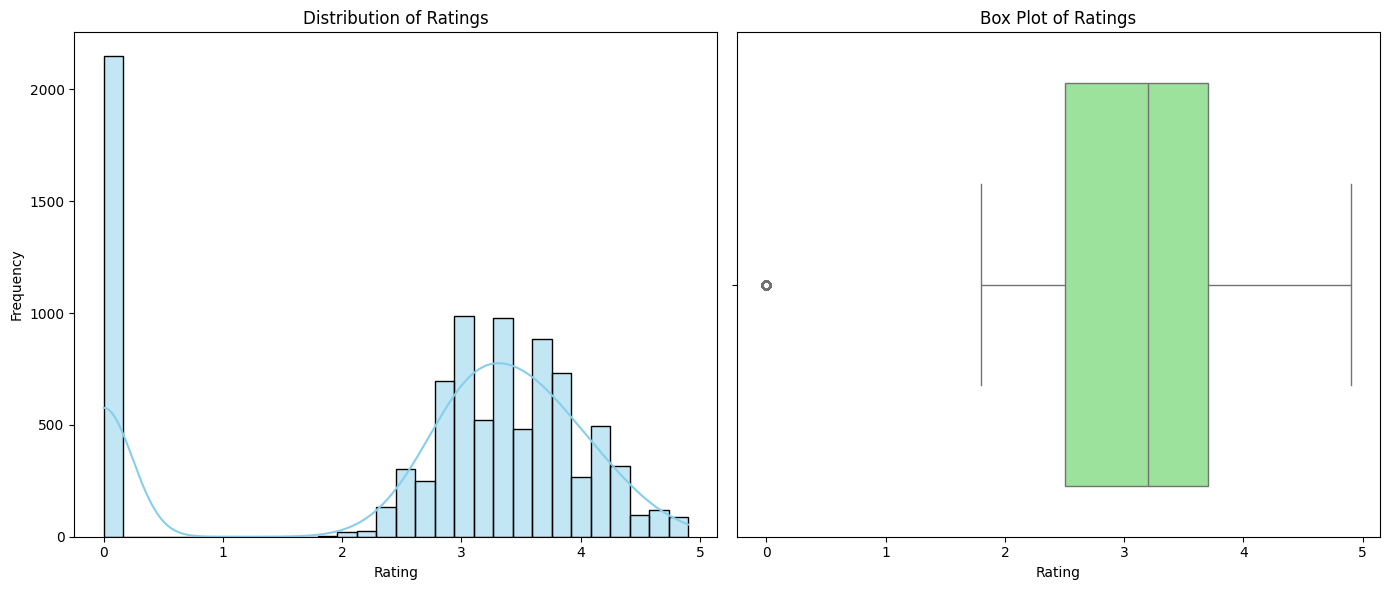

<ipython-input-5-22e3170951b1>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cuisine_avg_rating.index, x=cuisine_avg_rating.values, palette='viridis')


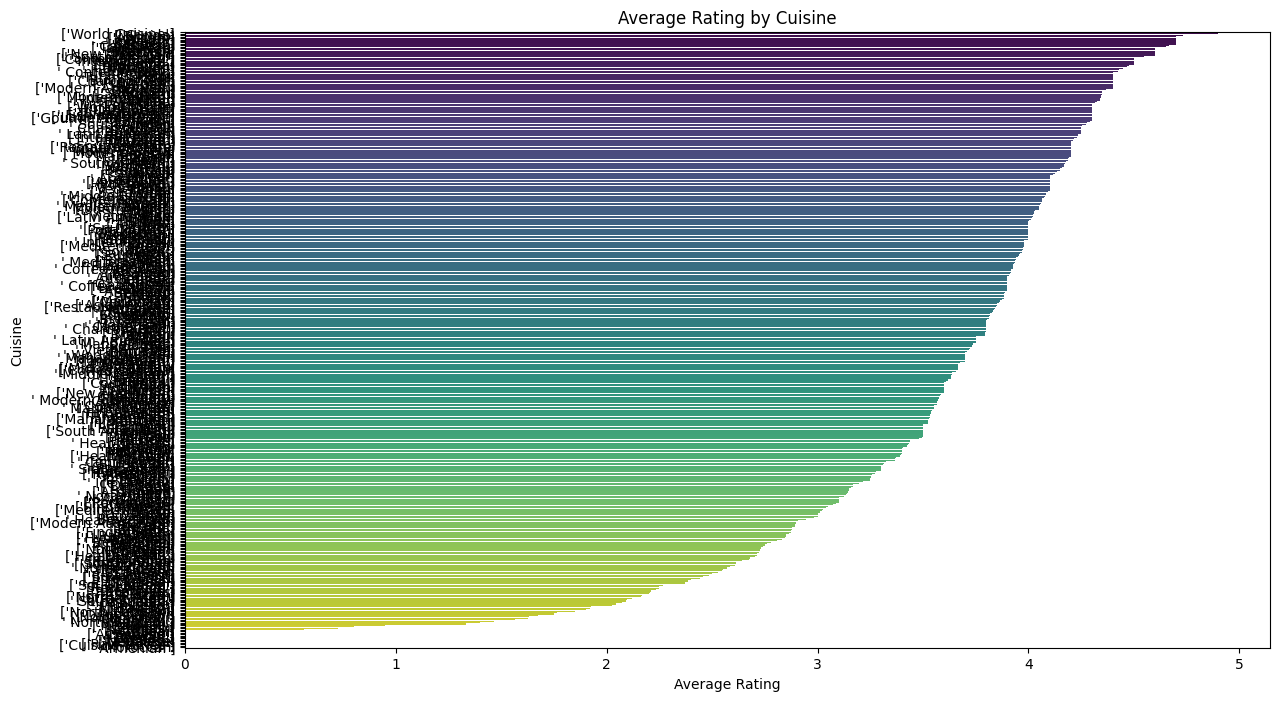

<ipython-input-5-22e3170951b1>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_avg_rating.index, x=city_avg_rating.values, palette='viridis')


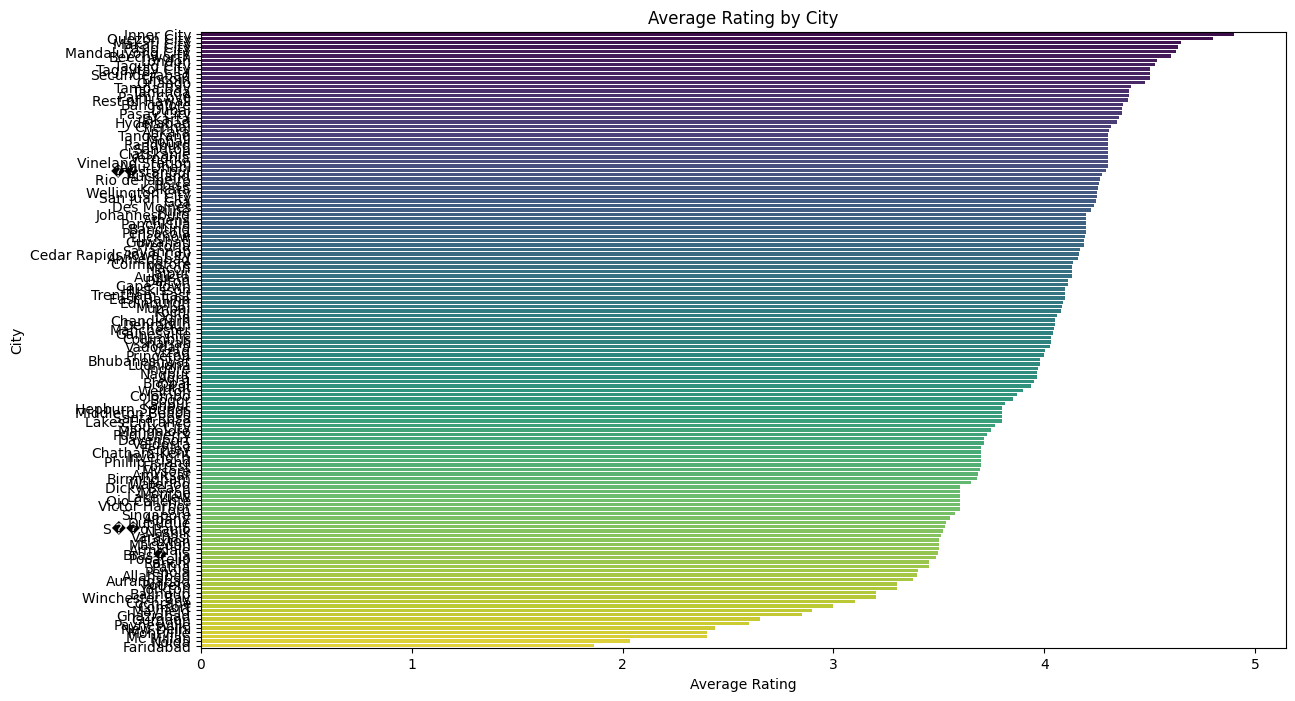

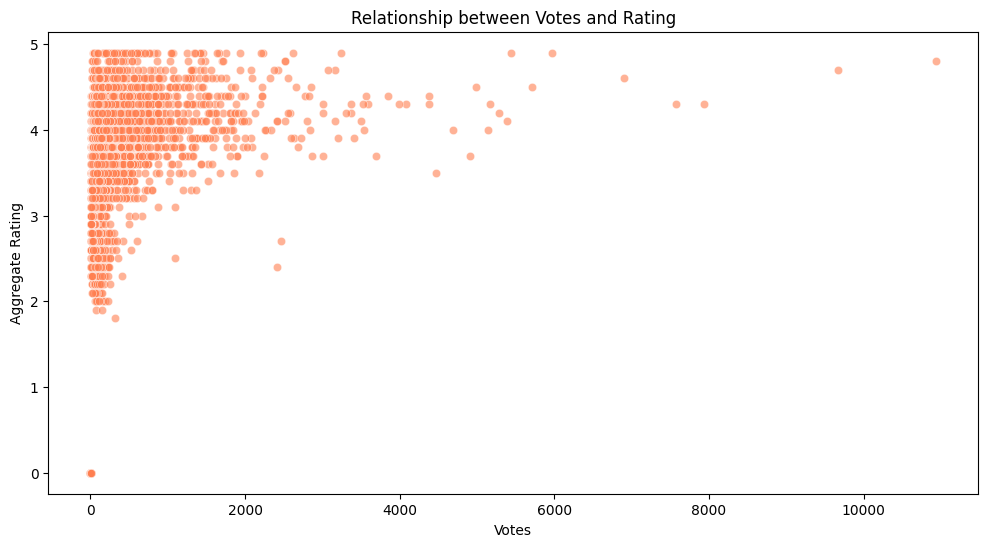

In [5]:
# Ensure necessary columns are in the dataset
required_columns = ['Aggregate rating', 'Cuisines', 'City', 'Votes']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"The dataset must contain '{col}' column.")

# 1. Visualize the distribution of ratings
plt.figure(figsize=(14, 6))

# Histogram of ratings
plt.subplot(1, 2, 1)
sns.histplot(df['Aggregate rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Box plot of ratings
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Aggregate rating'], color='lightgreen')
plt.title('Box Plot of Ratings')
plt.xlabel('Rating')

plt.tight_layout()
plt.show()

# 2. Compare the average ratings of different cuisines
# Explode cuisines if there are multiple per restaurant
df['Cuisines'] = df['Cuisines'].astype(str).str.split(', ')
df_exploded = df.explode('Cuisines')

# Calculate average rating by cuisine
cuisine_avg_rating = df_exploded.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(y=cuisine_avg_rating.index, x=cuisine_avg_rating.values, palette='viridis')
plt.title('Average Rating by Cuisine')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

# 3. Compare the average ratings of different cities
# Calculate average rating by city
city_avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(y=city_avg_rating.index, x=city_avg_rating.values, palette='viridis')
plt.title('Average Rating by City')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

# 4. Visualize the relationship between various features and the target variable
# Scatter plots for numeric features vs ratings
numeric_features = ['Votes']  # Add other numeric features if available

for feature in numeric_features:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x=feature, y='Aggregate rating', alpha=0.6, color='coral')
    plt.title(f'Relationship between {feature} and Rating')
    plt.xlabel(feature)
    plt.ylabel('Aggregate Rating')
    plt.show()

# Pairplot for numeric features (if there are more features)
# features_to_plot = ['Votes', 'Other Numeric Feature']  # Replace with actual feature names
# sns.pairplot(df[features_to_plot + ['Aggregate rating']])
# plt.title('Pairplot of Numeric Features')
# plt.show()